# Results analysis

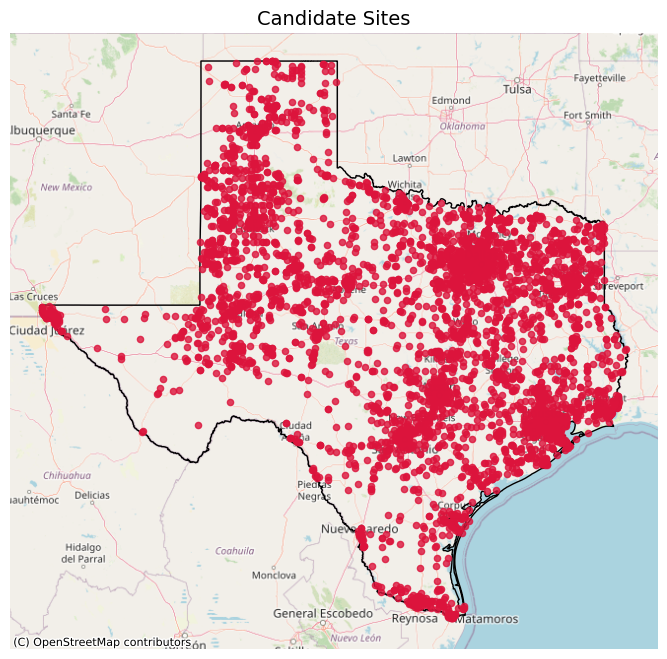

In [ ]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt

cand = pd.read_csv('TX_Substations.csv')

# Convert to GeoDataFrame
gdf2 = gpd.GeoDataFrame(
    cand,
    geometry=gpd.points_from_xy(cand["LONGITUDE"], cand["LATITUDE"]),
    crs="EPSG:4326"  # WGS84 lat/lon
)

# --- 1. Load US states boundary ---
# Download U.S. states from the census if not available
states = gpd.read_file("cb_2018_us_state_5m.zip")
texas = states[states["NAME"] == "Texas"]
texas = texas.to_crs(epsg=3857)  # convert to Web Mercator

# Convert to Web Mercator for tile background
gdf2 = gdf2.to_crs(epsg=3857)

# Plot Texas first (so it’s the background)
fig, ax = plt.subplots(figsize=(10, 8))
texas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.0)

# Plot your selected wind sites
gdf2.plot(ax=ax, color="crimson", alpha=0.8, markersize=20)

# Add base map tiles (street map background)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Title and formatting
ax.set_title("Candidate Sites", fontsize=14)
ax.set_axis_off()

# Zoom out so entire Texas is visible
xmin, ymin, xmax, ymax = texas.total_bounds
pad_x = (xmax - xmin) * 0.05  # 5% padding
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)


plt.show()

In [ ]:
results = pd.read_csv('timeseries_selected_vs_demand.csv')
results

,Unnamed: 0,demand_MW,wind_selected_MW,residual_MW
0,2020-01-01 07:00:00+00:00,36824.115099,4278.403990,32545.711109
1,2020-01-01 08:00:00+00:00,36531.366488,4402.785598,32128.580890
2,2020-01-01 09:00:00+00:00,36072.165020,4558.542547,31513.622473
3,2020-01-01 10:00:00+00:00,35836.161867,4497.703114,31338.458753
4,2020-01-01 11:00:00+00:00,35998.542722,4372.993775,31625.548947
...,...,...,...,...
8745,2020-12-31 19:00:00+00:00,49095.429980,1187.752392,47907.677588
8746,2020-12-31 20:00:00+00:00,48586.726240,1187.752392,47398.973848
8747,2020-12-31 21:00:00+00:00,48180.459312,1187.752392,46992.706920
8748,2020-12-31 22:00:00+00:00,47936.142951,1187.752392,46748.390559


In [ ]:
avg_demand = results['demand_MW'].mean()
avg_wind_selected = results['wind_selected_MW'].mean()
avg_residual = results['residual_MW'].mean()
print(avg_demand, avg_wind_selected, avg_residual)
print(avg_wind_selected/avg_demand*100,'%')

43482.52521537451 2127.003038212769 41355.52217716175
4.891627217318798 %


residuals are so high because this is only 50 wind farms, when texas has ~225, and wind itself is only ~20% of fuel mix

In [ ]:
# Load your selected sites
sel = pd.read_csv("selected_sites.csv")

# Load the original substation metadata (Excel file)
subs = pd.read_csv("TX_Substations.csv")

# Clean the names in the same way you did before (so they match)
subs["site"] = subs["NAME"].astype(str).str.strip().str.replace(" ", "_").str.upper()

# Merge to get coordinates for only the selected sites
merged = subs.merge(sel, on="site", how="inner")

print(f"Matched {len(merged)} sites")
print(merged[["site", "LATITUDE", "LONGITUDE"]].head())

Matched 50 sites
         site   LATITUDE   LONGITUDE
0    ALIBATES  35.254890 -101.359448
1    BUSHLAND  35.147777 -102.098532
2  COTTONWOOD  33.778148 -100.876583
3   GRAPEVINE  35.401934 -100.890966
4      GRUVER  36.264065 -101.410494


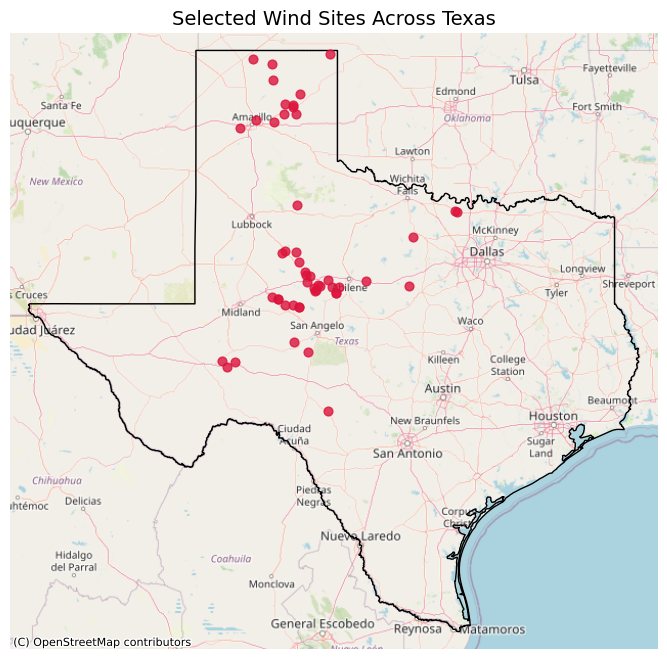

In [ ]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged,
    geometry=gpd.points_from_xy(merged["LONGITUDE"], merged["LATITUDE"]),
    crs="EPSG:4326"  # WGS84 lat/lon
)

# --- 1. Load US states boundary ---
# Download U.S. states from the census if not available
states = gpd.read_file("cb_2018_us_state_5m.zip")
texas = states[states["NAME"] == "Texas"]
texas = texas.to_crs(epsg=3857)  # convert to Web Mercator

# Convert to Web Mercator for tile background
gdf = gdf.to_crs(epsg=3857)

# Plot Texas first (so it’s the background)
fig, ax = plt.subplots(figsize=(10, 8))
texas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.0)

# Plot your selected wind sites
gdf.plot(ax=ax, color="crimson", alpha=0.8, markersize=40)

# Add base map tiles (street map background)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Title and formatting
ax.set_title("Selected Wind Sites Across Texas", fontsize=14)
ax.set_axis_off()

# Zoom out so entire Texas is visible
xmin, ymin, xmax, ymax = texas.total_bounds
pad_x = (xmax - xmin) * 0.03  # 10% padding
pad_y = (ymax - ymin) * 0.03

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

plt.show()

# Unannounced sites results

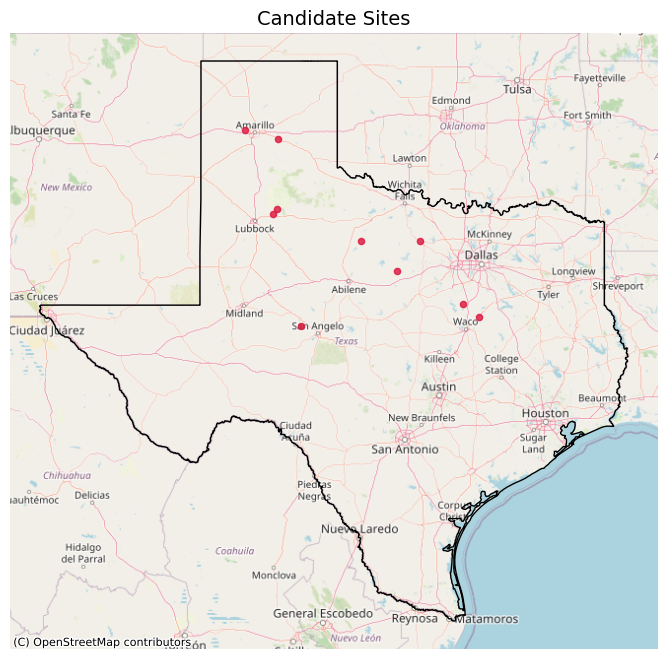

In [10]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt

cand = pd.read_csv('candidate_sites_new.csv')

# Convert to GeoDataFrame
gdf2 = gpd.GeoDataFrame(
    cand,
    geometry=gpd.points_from_xy(cand["LONGITUDE"], cand["LATITUDE"]),
    crs="EPSG:4326"  # WGS84 lat/lon
)

# --- 1. Load US states boundary ---
# Download U.S. states from the census if not available
states = gpd.read_file("cb_2018_us_state_5m.zip")
texas = states[states["NAME"] == "Texas"]
texas = texas.to_crs(epsg=3857)  # convert to Web Mercator

# Convert to Web Mercator for tile background
gdf2 = gdf2.to_crs(epsg=3857)

# Plot Texas first (so it’s the background)
fig, ax = plt.subplots(figsize=(10, 8))
texas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.0)

# Plot your selected wind sites
gdf2.plot(ax=ax, color="crimson", alpha=0.8, markersize=20)

# Add base map tiles (street map background)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Title and formatting
ax.set_title("Candidate Sites", fontsize=14)
ax.set_axis_off()

# Zoom out so entire Texas is visible
xmin, ymin, xmax, ymax = texas.total_bounds
pad_x = (xmax - xmin) * 0.05  # 5% padding
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)


plt.show()

In [11]:
# Load your selected sites
sel = pd.read_csv("selected_sites_new.csv")

# Load the original substation metadata (Excel file)
subs = pd.read_csv("candidate_sites_new.csv")

# Clean the names in the same way you did before (so they match)
subs["site"] = subs["NAME"].astype(str).str.strip().str.replace(" ", "_").str.upper()

# Merge to get coordinates for only the selected sites
merged = subs.merge(sel, on="site", how="inner")

print(f"Matched {len(merged)} sites")
print(merged[["site", "LATITUDE", "LONGITUDE"]].head())

Matched 4 sites
                  site  LATITUDE  LONGITUDE
0           CAROL_WIND   35.2598  -102.0643
1  GOODNIGHT_WIND_FARM   35.0939  -101.3260
2      LASSO_WIND_FARM   33.2127   -98.1639
3         LA_CASA_WIND   32.6351   -98.6772


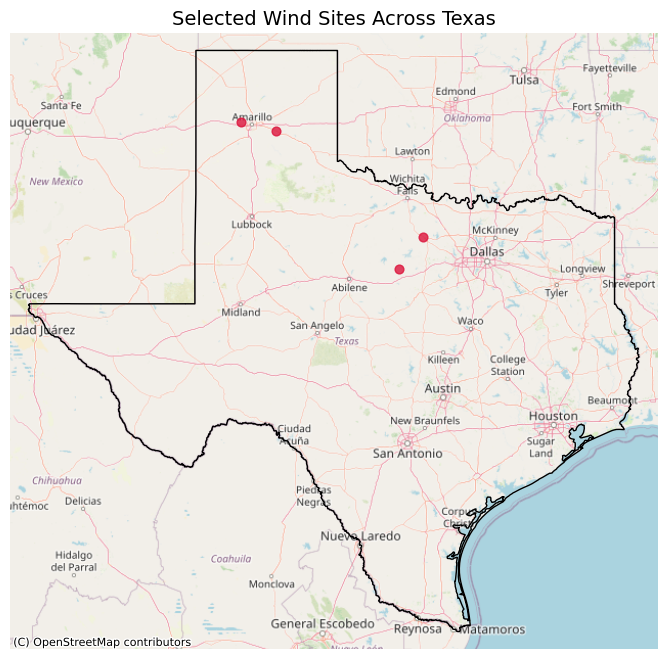

In [12]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged,
    geometry=gpd.points_from_xy(merged["LONGITUDE"], merged["LATITUDE"]),
    crs="EPSG:4326"  # WGS84 lat/lon
)

# --- 1. Load US states boundary ---
# Download U.S. states from the census if not available
states = gpd.read_file("cb_2018_us_state_5m.zip")
texas = states[states["NAME"] == "Texas"]
texas = texas.to_crs(epsg=3857)  # convert to Web Mercator

# Convert to Web Mercator for tile background
gdf = gdf.to_crs(epsg=3857)

# Plot Texas first (so it’s the background)
fig, ax = plt.subplots(figsize=(10, 8))
texas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.0)

# Plot your selected wind sites
gdf.plot(ax=ax, color="crimson", alpha=0.8, markersize=40)

# Add base map tiles (street map background)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Title and formatting
ax.set_title("Selected Wind Sites Across Texas", fontsize=14)
ax.set_axis_off()

# Zoom out so entire Texas is visible
xmin, ymin, xmax, ymax = texas.total_bounds
pad_x = (xmax - xmin) * 0.03  # 10% padding
pad_y = (ymax - ymin) * 0.03

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)

plt.show()